In [274]:
import numpy as np
from matplotlib import pyplot as plt
from triqs.gf import *
from triqs.operators import *
from triqs.atom_diag import *
from triqs.plot.mpl_interface import oplot

In [275]:
eta=0.1   # broadening parameter as in (omega+i*eta)
a = 1     # The lattice constant a

def hybridization(omega, mu, epsilon_k_array, t_k_array):
    # Full expression of the hybridization
    # given itinerant electron energies epsilon_k_array
    # and hopping parameters t_k_array
    return 1/(2*np.pi/a)*(1/len(t_k_array))*np.sum((t_k_array**2/(omega+1j*eta - epsilon_k_array+ mu)))

## Hybridization with a one-dimensional bath

In [295]:
# k mesh from -pi/a to pi/a
n_k = 1000
k_array = np.pi/a*np.linspace(-1,1,n_k)

# The 1D chain has the dispersion -2*t*cos(k). Assume t=1
mu=0
epsilon_k_array = -2*np.cos(k_array) - mu

# Assume that the local impurity level is at zero => epsilon_d=0
# Then the hopping between the local impurity and the itinerant electrons 
# could reasonably be approximated as a Gaussian peaked around 0 (epsilon_d)
width=1
t_k=1
t_k_array = np.exp(-(epsilon_k_array/width)**2)

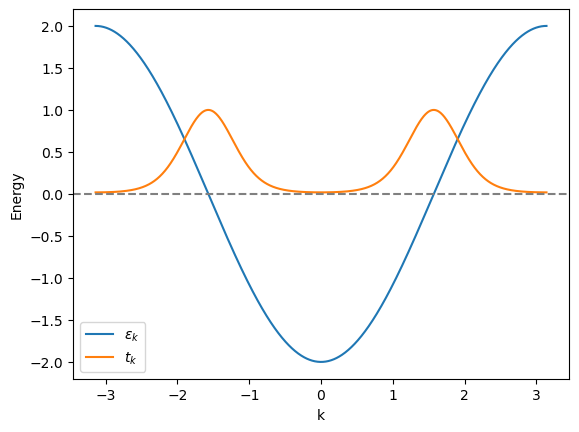

In [296]:
plt.plot(k_array, eta_k_array, label='$\\epsilon_k$')
plt.plot(k_array, t_k_array, label='$t_k$')
plt.xlabel('k')
plt.ylabel('Energy')
plt.legend()
plt.axhline(0, color='gray', linestyle='dashed')

Text(0, 0.5, 'Hybridization, $\\Sigma^R(\\omega)$')

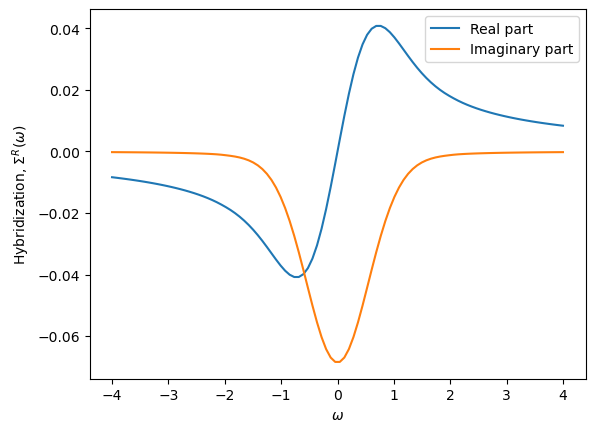

In [297]:
omega_array=np.linspace(-4,4,100) # Define the omega_mesh
hybridization_array=np.array([hybridization(omega, mu, epsilon_k_array, t_k_array) for omega in omega_array])

plt.plot(omega_array, hybridization_array.real, label= 'Real part')
plt.plot(omega_array, hybridization_array.imag, label= 'Imaginary part')
plt.legend()
plt.xlabel('$\\omega$')
plt.ylabel('Hybridization, $\\Sigma^R(\omega)$')

### Question

Play with the parameters in the cells above? How does the form of the hybridization function change with the width of the Gaussian $t_k$? What happens when the width of the Gaussian is comparable to the bandwidth of the itinerant electrons? What happens when it exceeds the bandwidth of the itinerant electrons?

## Flat hybridization

In [298]:
def flat_hybridization(omega, mu):
    W = 2

    ret = 0

    energies=np.linspace(-W,W,1000)
    de = 2*W/1000
    nu=1
    for ee in energies:
        ret+=(de/2*W)*1/(2*np.pi)*t_k**2/(omega + 1j*eta - ee + mu)

    return ret

Text(0, 0.5, 'Hybridization, $\\Sigma^R(\\omega)$')

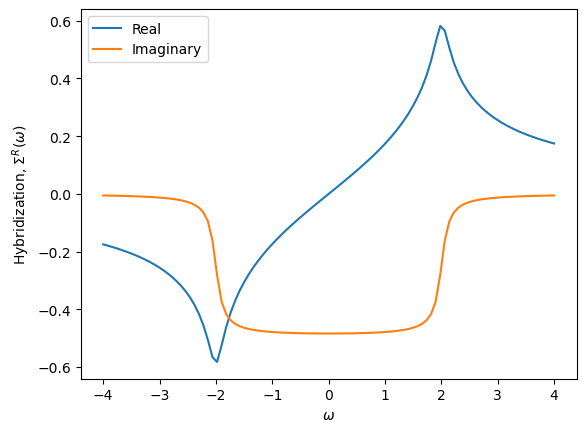

In [299]:
omega_array=np.linspace(-4,4,100)
hybridization_array=np.array([flat_hybridization(omega, mu) for omega in omega_array])
plt.plot(omega_array, hybridization_array.real, label='Real')
plt.plot(omega_array, hybridization_array.imag, label='Imaginary')
plt.legend()
plt.xlabel('$\\omega$')
plt.ylabel('Hybridization, $\\Sigma^R(\omega)$')

### Question

Refer back to your response to part c). What is the role of the imaginary part of the hybridization?

## Analytic consinuation -> Hybridization on the Matsubara axis

The Hybridization function can also be analytically continued to the Matsubara axis.
Use the cells below to plot the hybridization function on the Matsubara axis at different temperatures.

In [306]:
beta = 10
iomega_array = np.pi*(2*np.arange(-30,30)+1)/(beta)

### Full hybridization of the 1D chain

Text(0, 0.5, 'Hybridization, $\\Sigma^R(i\\omega_n)$')

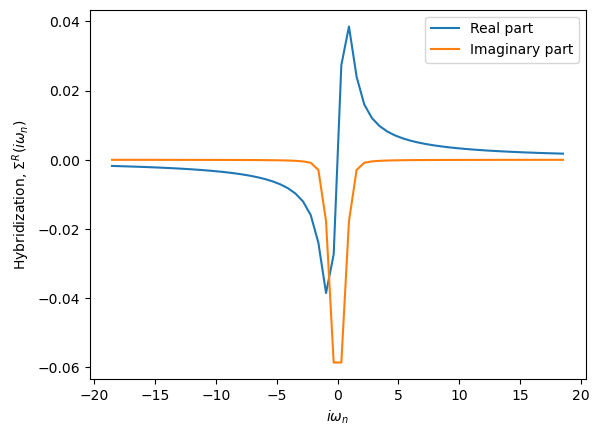

In [307]:
hybridization_array=np.array([hybridization(iomega, mu, epsilon_k_array, t_k_array) for iomega in iomega_array])

plt.plot(iomega_array, hybridization_array.real, label= 'Real part')
plt.plot(iomega_array, hybridization_array.imag, label= 'Imaginary part')
plt.legend()
plt.xlabel('$i\\omega_n$')
plt.ylabel('Hybridization, $\\Sigma^R(i\omega_n)$')

### Flat hybridization

Text(0, 0.5, 'Hybridization, $\\Sigma^R(i\\omega_n)$')

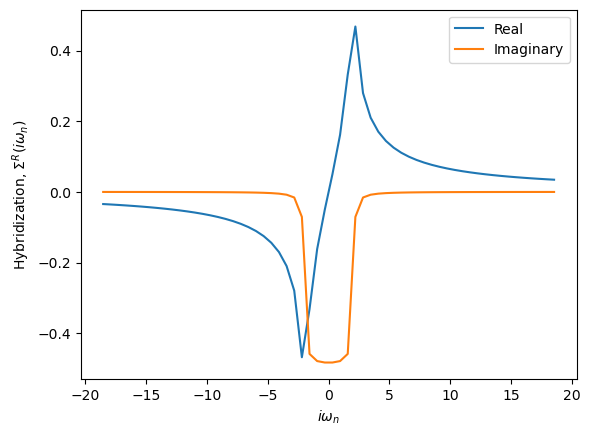

In [309]:
hybridization_array=np.array([flat_hybridization(iomega, mu) for iomega in iomega_array])
plt.plot(iomega_array, hybridization_array.real, label='Real')
plt.plot(iomega_array, hybridization_array.imag, label='Imaginary')
plt.legend()
plt.xlabel('$i\\omega_n$')
plt.ylabel('Hybridization, $\\Sigma^R(i\omega_n)$')